In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import MultiComparison
from scipy.stats import spearmanr, pearsonr
pd.set_option('display.width', 2000)

In [57]:
nucleus_df = pd.read_csv('csv/nuclei_g4.csv')


In [58]:
nucleus_df = nucleus_df[nucleus_df['CellType'].isin(['neunPositive', 'neunPositiveLow'])]
# Assuming 'df' is your DataFrame
print(nucleus_df[nucleus_df['ImageName'].str.contains('MIX2')])
nucleus_df.loc[nucleus_df['ImageName'].str.contains('MIX2'), 'Ch3Intensity'] = nucleus_df.loc[nucleus_df['ImageName'].str.contains('MIX2'), 'Ch2Intensity']
print(nucleus_df[nucleus_df['ImageName'].str.contains('MIX2')])
print(nucleus_df)
print(len(nucleus_df[nucleus_df['CellType']=='neunPositiveLow']))
print(nucleus_df['Location'].unique())

Empty DataFrame
Columns: [Condition, ImageName, Label, Area, Centroid, CellType, Location, Ch1Intensity, Ch2Intensity, Ch3Intensity, Ch4Intensity, CytoCh1Intensity, CytoCh2Intensity, CytoCh3Intensity, CytoCh4Intensity]
Index: []
Empty DataFrame
Columns: [Condition, ImageName, Label, Area, Centroid, CellType, Location, Ch1Intensity, Ch2Intensity, Ch3Intensity, Ch4Intensity, CytoCh1Intensity, CytoCh2Intensity, CytoCh3Intensity, CytoCh4Intensity]
Index: []
       Condition                                          ImageName  Label    Area                                           Centroid         CellType   Location  Ch1Intensity  Ch2Intensity  Ch3Intensity  Ch4Intensity  CytoCh1Intensity  CytoCh2Intensity  CytoCh3Intensity  CytoCh4Intensity
0         Contra  HI 1 Contralateral Mouse 8 Slide18 G4green Neu...      1  1311.0  (3.887109077040427, 2341.739893211289, 2699.13...  neunPositiveLow         DG     30.109077      0.247902     42.160183     52.469108               NaN               Na

   Condition                                          ImageName  Ch3Intensity
0     Contra  HI 1 Contralateral Mouse 8 Slide18 G4green Neu...     74.958347
1     Contra  HI 2 Contralateral Mouse 9 Slide17 G4green Neu...     62.445271
2     Contra  HI 2 Contralateral Mouse 9 Slide17 G4green Neu...     63.903068
3     Contra  HI 3 Contralateral Mouse 10 Slide18 G4green Ne...     50.415409
4       Ipsi  HI 1 Ipsilateral Mouse 8 Slide18 G4green NeuNp...     61.430825
5       Ipsi  HI 1 Ipsilateral Mouse 8 Slide18 G4green NeuNp...     71.482686
6       Ipsi  HI 2 Ipsilateral Mouse 9 Slide17 G4green NeuNp...     65.611267
7       Ipsi  HI 2 Ipsilateral Mouse 9 Slide17 G4green NeuNp...     70.218936
9       Ipsi  HI 3 Ipsilateral Mouse 10 Slide18 G4green NeuN...     61.058131
11      Sham  Sham 1 Contralateral Mouse 6 Slide15 G4green N...     60.453497
12      Sham  Sham 1 Ipsilateral Mouse 6 Slide15 G4green Neu...     83.453152
13      Sham  Sham 1 Ipsilateral Mouse 6 Slide15 G4green Neu... 

c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jonasvg\AppData\Local\miniconda3\envs\image_analysis\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


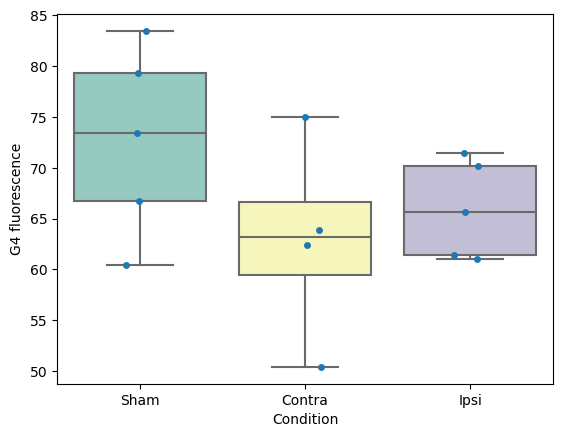

In [61]:
order =['Sham', 'Contra', 'Ipsi']

mean_ch3_intensity = nucleus_df.groupby(['Condition', 'ImageName'])['Ch3Intensity'].mean().reset_index()
mean_ch3_intensity = mean_ch3_intensity.drop(8)
mean_ch3_intensity = mean_ch3_intensity.drop(10)
print(mean_ch3_intensity)
sns.boxplot(data=mean_ch3_intensity, showfliers = False, x='Condition', y='Ch3Intensity', order=order, palette='Set3')
sns.stripplot(data=mean_ch3_intensity, x='Condition', y='Ch3Intensity', order=order)
plt.ylabel('G4 fluorescence')
plt.show()

In [62]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(mean_ch3_intensity.keys())

anova_results = f_oneway(mean_ch3_intensity[mean_ch3_intensity['Condition'] == 'Contra']['Ch3Intensity'],
                         mean_ch3_intensity[mean_ch3_intensity['Condition'] == 'Ipsi']['Ch3Intensity'],
                         mean_ch3_intensity[mean_ch3_intensity['Condition'] == 'Sham']['Ch3Intensity'])

# Perform Tukey HSD post hoc test
tukey_results = pairwise_tukeyhsd(mean_ch3_intensity['Ch3Intensity'], mean_ch3_intensity['Condition'])

print("ANOVA Results:")
print("F-statistic:", anova_results.statistic)
print("p-value:", anova_results.pvalue)

print("\nTukey HSD Results:")
print(tukey_results)

Index(['Condition', 'ImageName', 'Ch3Intensity'], dtype='object')
ANOVA Results:
F-statistic: 1.7023767209110394
p-value: 0.22692257773710447

Tukey HSD Results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
Contra   Ipsi   3.0298 0.8484 -11.836 17.8957  False
Contra   Sham   9.7434 0.2243 -5.1225 24.6093  False
  Ipsi   Sham   6.7136 0.4273 -7.3021 20.7293  False
----------------------------------------------------
